[*********************100%%**********************]  1 of 1 completed
c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


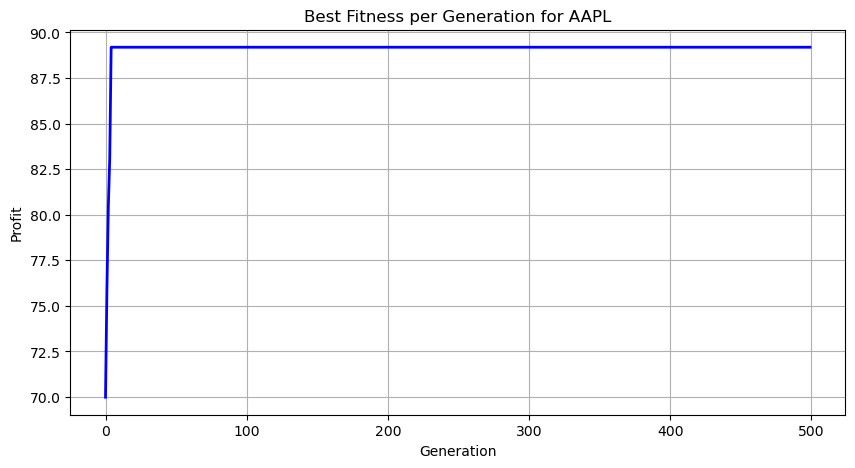

[*********************100%%**********************]  1 of 1 completed

AAPL :  89.19001007080078



c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


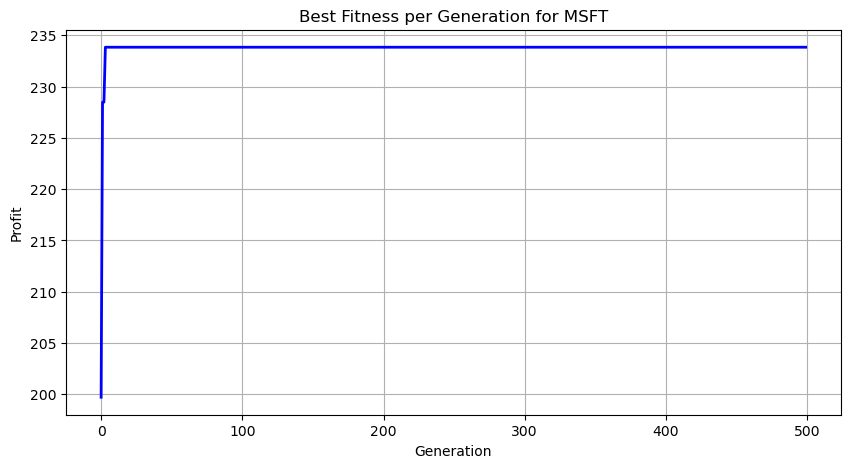

[*********************100%%**********************]  1 of 1 completed

MSFT :  233.8400115966797



c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


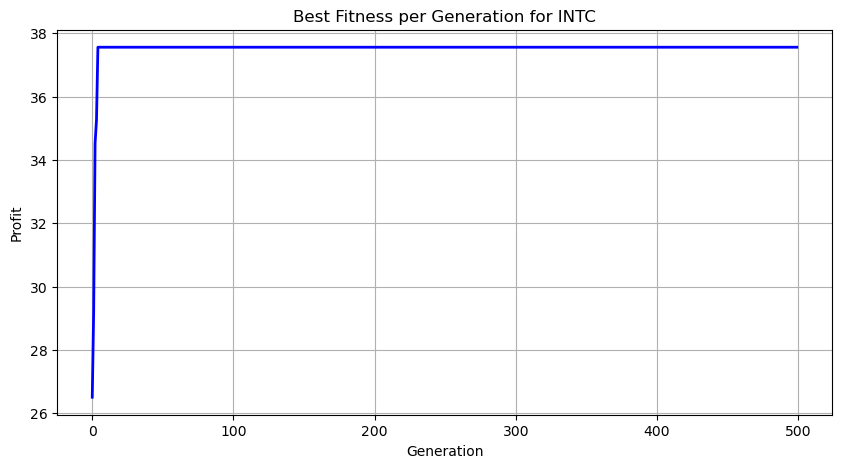

[*********************100%%**********************]  1 of 1 completed

INTC :  37.560001373291016



c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


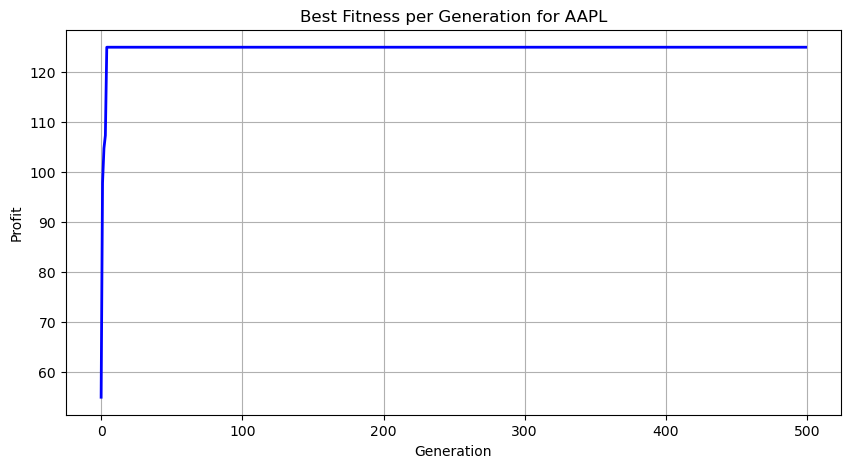

[*********************100%%**********************]  1 of 1 completed
c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


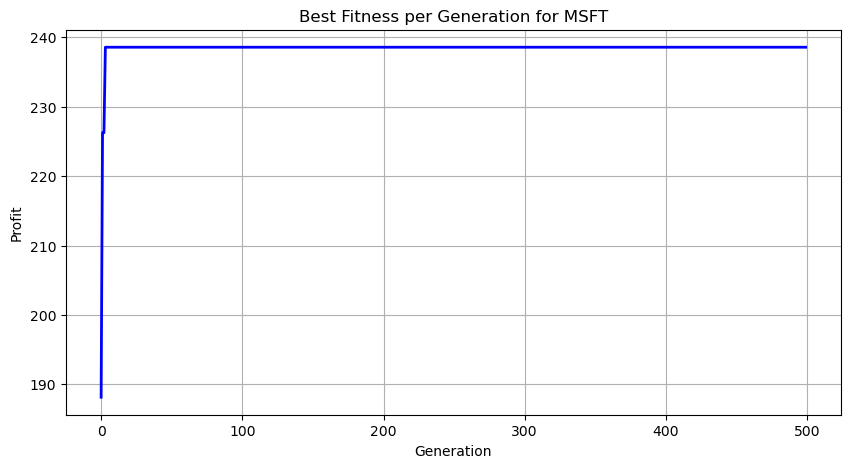

[*********************100%%**********************]  1 of 1 completed
c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Snehal\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


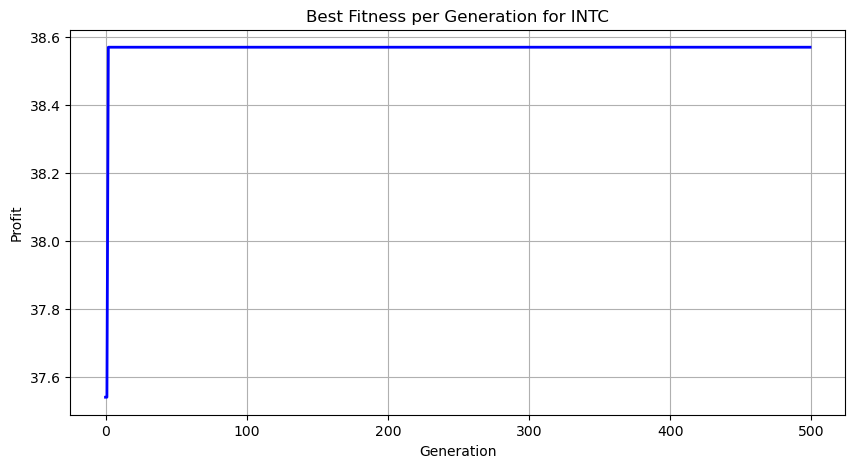

net profit from mutual fund ::: $ 402.0675048828125


In [7]:
import random
from deap import base, creator, tools, algorithms
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Fetch stock data
def fetch_data(stock_symbol, start_date, end_date):
    data = yf.download(stock_symbol, start=start_date, end=end_date)
    return data['Close']

# Fitness function to maximize
def evaluate(individual, price_data):
    buy_price = price_data[individual[0]]
    sell_price = price_data[individual[1]]
    profit = sell_price - buy_price
    return profit,

# Genetic algorithm setup
def setup_ga(price_data):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_int", random.randint, 0, len(price_data) - 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual,
                     toolbox.attr_int, 2)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", evaluate, price_data=price_data)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    return toolbox

def exec(ticker):
    stock_symbol = ticker
    start_date = '2020-04-10'
    end_date = '2024-04-15'
    
    price_data = fetch_data(stock_symbol, start_date, end_date).tolist()

    toolbox = setup_ga(price_data)

    population = toolbox.population(n=50)
    NGEN = 500
    best_fitness = []

    for gen in range(NGEN):
        offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
        fits = toolbox.map(toolbox.evaluate, offspring)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        population = toolbox.select(offspring, k=len(population))

        # Extract and display the best individual from each generation
        best_ind = tools.selBest(population, 1)[0]
        best_fitness.append(best_ind.fitness.values[0])
        # Plot the best fitness over generations
    plt.figure(figsize=(10, 5))
    plt.plot(best_fitness, color='blue', linewidth=2)
    plt.title('Best Fitness per Generation for ' + ticker)
    plt.xlabel('Generation')
    plt.ylabel('Profit')
    plt.grid(True)
    plt.show()
    best_ind = tools.selBest(population, 1)[0]
    return evaluate(best_ind, price_data)[0]

# if __name__ == "__main__":
print('AAPL : ', exec('AAPL'))
print('MSFT : ', exec('MSFT'))
print('INTC : ', exec('INTC'))
print('net profit from mutual fund ::: $', exec('AAPL') + exec('MSFT') + exec('INTC'))
